<a href="https://colab.research.google.com/github/Aiirce/Evidencia_Proyecto/blob/Code/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Prerequisito***

In [ ]:
!pip install easyocr #Installs a library that helps us read the image by converting it to text.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 29.6 MB/s eta 0:00:00


***Helper***

In [108]:
# Purpose. It extracts all the strings from a nested
# list and proceeds to join them together with spaces
# while returning them into a specified format.

import re

def process_entities(data): #starts the function taking data as input

    strings = [] #creates the list where extracted strings will reside

    # Recursive function to dig through nested lists/tuples
    def extract_strings(item): #Defines a nested function that recursively(by repetition) searches for strings
    #Recursion means that a function calls itself, in this case useful to explore structures of unknown depth.
        if isinstance(item, (list, tuple)): #Checks if the "item" is a list or tuple, thus returnign true if it is.
            for subitem in item: #if it is a list or tuple, then it loops through each element.
            # Ex there could be up to 100 lists (each list a subitem) inside a list (item) and we search through the contents from the subitem.
                extract_strings(subitem) #It is called again
        elif isinstance(item, str): # Here it checks if the data is string within the list.
            strings.append(item) # If the data found within the list is a string then we append it to the list.

    # Start recursion
    extract_strings(data) #Here the recursion is called, it goes through every level of list/tuples
    # until all strings are found.

    # Combine all strings into one entity name
    name = " ".join(strings).strip() #We create a variable "name" which joins the strings with a space between them
    #and lastly, the strip serves to clean up the data from spaces at the start or at the end.
    name = re.sub(r'[^\w\s]', '', name)  # keep only letters, numbers, and spaces

    # Return in the expected format
    return [{'name': name}] if name else [] #If name is not empty then it returns a list and dictionary.

def get_entity_info(entity_name): #Calls the function to assign the map with its correct information.
    info_dict = { #Creates a set/dictionary, an unordered collection of unique elements
        "ROYAL PALACE": "Frontline/Tank: Peni Parker and Doctor Strange also being strong for setting up key portals. \n               Damage:  Wolverine \n               Support/Control: Loki, Luna, or Rocket. Constant healing and teamups with Peni Parker",
        "HELLS HEAVEN": "Frontline/Tank: Magneto, Thor, or Doctor Strange \n               Damage: Black Panther, Punisher, or Hawkeye \n               Support/Control: Mantis, Luna, or Loki",
        "MIDTOWN ": "Frontline/Tank: Magneto, Doctor Strange, or Emma Frost \n               Damage: Iron Man, Moon knight, or Mister Fantastic \n               Support/Control: Jeff, Luna, or Loki",
        "HEART OF HEAVEN": "Frontline/Tank: Groot, and Captain America \n               Damage: Hela, Hawkeye, or Moonknight \n               Support/Control: Jeff, Luna, or Invisible Woman",
        "YGGDRASILL PATH": "Frontline/Tank: Groot, and Magneto \n                Damage: Hela, Punisher, or Moonknight \n               Support/Control: Rocket Racoon, Luna, or Invisible Woman",
        "SPIDER ISLANDS": "Frontline/Tank: Groot, and Peni Parker for bottlenecks \n                  Damage: Hela, Black Panther, or Moonknight \n                  Support/Control: Rocket Racoon, Luna, or Invisible Woman"

    }
    return info_dict.get(entity_name.upper(), "Unknown entity") #Returns the information stored in the dictionary







In [109]:
# --- MAIN EXECUTION ---
entities = process_entities(lit_result) #Calls the function to find effectively the name of the map
#Returning a list of dictionaries for us to classify later.
print(entities) #We validate the name of the map

for e in entities: # A loop that iterates through each element of the entire entities list
#The code can extract each value from the dictionary individually. Each element e is part of the dictionary.
    print(f"{e['name']} → {get_entity_info(e['name'])}") # e[name], e is one element from the entities list
    #In the return from process_entities we stored the map under the key 'name'.
    #Basically name is our key and opens the door to find the map
    #Next we call the function get_entity_info with the argument being the map.
    #The f... helps us to print with format, combining static text with dynamic variables

# Use the cleaned entities


[{'name': 'HELLS HEAVEN'}]
HELLS HEAVEN → Frontline/Tank: Magneto, Thor, or Doctor Strange 
               Damage: Black Panther, Punisher, or Hawkeye 
               Support/Control: Mantis, Luna, or Loki


***Helper ENDS HERE***


***Royal palace***

[([[np.int32(679), np.int32(315)], [np.int32(929), np.int32(315)], [np.int32(929), np.int32(407)], [np.int32(679), np.int32(407)]], 'ROYAL', np.float64(0.9885294856787553)), ([[np.int32(660), np.int32(415)], [np.int32(954), np.int32(415)], [np.int32(954), np.int32(507)], [np.int32(660), np.int32(507)]], 'PALACE', np.float64(0.9924243629652436))]


(np.float64(-0.5), np.float64(1599.5), np.float64(898.5), np.float64(-0.5))

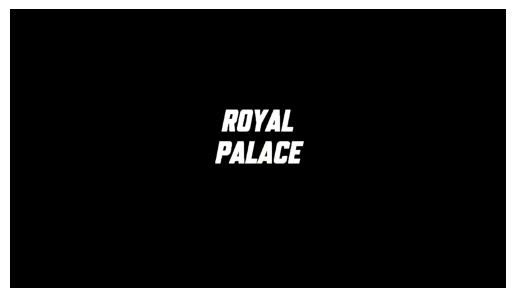

In [85]:
import easyocr #Reads and process images
import cv2 # OpenCV for image processing
import matplotlib.pyplot as plt # Used to display images and tables
import numpy as np #Habdles arrays and matrices (images are 3D arrays of pixels)

map = cv2.imread("RoyalPalace.jpeg") #Reads file using OpenCV and loads the image into map.
map_rgb=cv2.cvtColor(map, cv2.COLOR_BGR2RGB) # Converts image from BGR to RGB (Red, Green, Blue) as Matplotlib expects RGB

kernel1 = np.ones((3,3), np.uint8)# 3x3 matrix of ones of 8 bits (used for image dilation/Expanding white areas)
lower_white = np.array([232,232,232], dtype=np.uint8) #Defines white shades to detect in the image
upper_white = np.array([255,255,255], dtype=np.uint8) # In this case useful for shades of grey or faded white.

mask1 = cv2.inRange(map_rgb, lower_white, upper_white) #Creates a binary mask (black and white) where the pixel
#colour is between lower white and upper white. Isolating the white parts of the map.

white_map = cv2.bitwise_and(map_rgb, map_rgb, mask=mask1) #Combines the original image (in RGB) with the mask
# using bitwise AND operation. Now we only see where the white parts are visible
dilated_map = cv2.dilate(white_map, kernel1, 1) #Expands white regions using kernel. The number (1 in this case) is
#the amount of times we apply the expansion. Connects/fills gap of separated words.

height, width, _ = map_rgb.shape # gets the dimension of the image
img1 = np.zeros((height, width),dtype=np.uint8) #img1 creates a black image comprised of zeroes with the
# same size as the original image
cv2.rectangle(img1, (600,250), (1100,500), 255,-1) #Draws a white rectangle on the black image from a certain lenght and width.
masked_map = cv2.bitwise_and(dilated_map, dilated_map, mask=img1) #Applies the rectangular mask on the dilated_map
#Only keeps pixels inside that rectangle and the rest is black.

reader = easyocr.Reader(['en']) #Creates an EasyOCR reader object that regonises text in english.
lit_result = reader.readtext(masked_map) #Passes the processed image to EasyOCR to read it.
print(lit_result)

plt.imshow(masked_map)
plt.axis("off")

***MIDTOWN***

[([[np.int32(625), np.int32(353)], [np.int32(983), np.int32(353)], [np.int32(983), np.int32(445)], [np.int32(625), np.int32(445)]], 'MIDTOWN', np.float64(0.8200138955371299)), ([[np.int32(781), np.int32(455)], [np.int32(916), np.int32(455)], [np.int32(916), np.int32(485)], [np.int32(781), np.int32(485)]], '":', np.float64(0.0178700865322322))]


(np.float64(-0.5), np.float64(1599.5), np.float64(886.5), np.float64(-0.5))

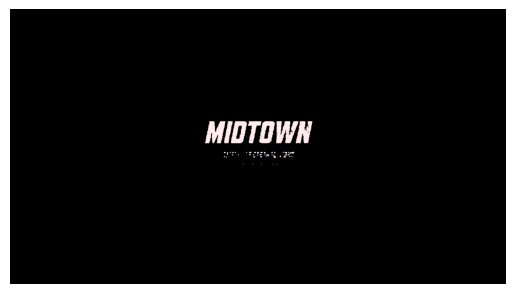

In [88]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np


map = cv2.imread("Midtown.jpeg")

map_rgb=cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3), np.uint8)#5
lower_white = np.array([231,231,231], dtype=np.uint8)
upper_white = np.array([255,255,255], dtype=np.uint8)

mask1 = cv2.inRange(map_rgb, lower_white, upper_white)

white_map = cv2.bitwise_and(map_rgb, map_rgb, mask=mask1)
dilated_map = cv2.dilate(white_map, kernel1, 1)

height, width, _ = map_rgb.shape
img1 = np.zeros((height, width),dtype=np.uint8)
cv2.rectangle(img1, (600,250), (1100,500), 255,-1)
masked_map = cv2.bitwise_and(dilated_map, dilated_map, mask=img1)

reader = easyocr.Reader(['en'])
lit_result = reader.readtext(masked_map)
print(lit_result)

plt.imshow(masked_map)
plt.axis("off")

***Heart of Heaven***

[([[np.int32(553), np.int32(371)], [np.int32(1048), np.int32(371)], [np.int32(1048), np.int32(443)], [np.int32(553), np.int32(443)]], 'HEART OF HEAVEN', np.float64(0.822168759277032))]


(np.float64(-0.5), np.float64(1599.5), np.float64(898.5), np.float64(-0.5))

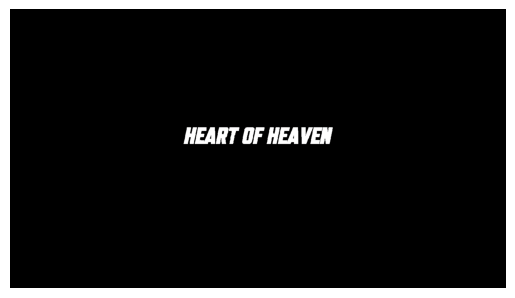

In [91]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

map = cv2.imread("Heart_of_heaven.jpeg")

map_rgb=cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3), np.uint8)#5
lower_white = np.array([245,250,245], dtype=np.uint8)
upper_white = np.array([255,255,255], dtype=np.uint8)

mask1 = cv2.inRange(map_rgb, lower_white, upper_white)

white_map = cv2.bitwise_and(map_rgb, map_rgb, mask=mask1)
dilated_map = cv2.dilate(white_map, kernel1, 1)

height, width, _ = map_rgb.shape
img1 = np.zeros((height, width),dtype=np.uint8)
cv2.rectangle(img1, (500,250), (1100,450), 255,-1)
masked_map = cv2.bitwise_and(dilated_map, dilated_map, mask=img1)

reader = easyocr.Reader(['en'])
lit_result = reader.readtext(masked_map)
print(lit_result)

plt.imshow(masked_map)
plt.axis("off")

***Yggdrassil path***

[([[np.int32(628), np.int32(332)], [np.int32(974), np.int32(332)], [np.int32(974), np.int32(406)], [np.int32(628), np.int32(406)]], 'YGGDRASILL', np.float64(0.5169840634815387)), ([[np.int32(719), np.int32(409)], [np.int32(882), np.int32(409)], [np.int32(882), np.int32(485)], [np.int32(719), np.int32(485)]], 'PATH', np.float64(0.9999327659606934))]


(np.float64(-0.5), np.float64(1599.5), np.float64(898.5), np.float64(-0.5))

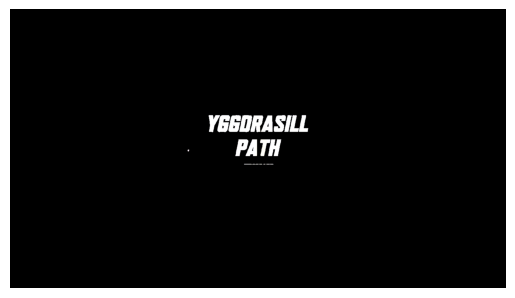

In [94]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

map = cv2.imread("yyggdrasill_path.jpeg")

map_rgb=cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3), np.uint8)#5
lower_white = np.array([232,232,232], dtype=np.uint8)
upper_white = np.array([255,255,255], dtype=np.uint8)

mask1 = cv2.inRange(map_rgb, lower_white, upper_white)

white_map = cv2.bitwise_and(map_rgb, map_rgb, mask=mask1)
dilated_map = cv2.dilate(white_map, kernel1, 1)

height, width, _ = map_rgb.shape
img1 = np.zeros((height, width),dtype=np.uint8)
cv2.rectangle(img1, (500,250), (1100,500), 255,-1)
masked_map = cv2.bitwise_and(dilated_map, dilated_map, mask=img1)

reader = easyocr.Reader(['en'])
lit_result = reader.readtext(masked_map)
print(lit_result)


plt.imshow(masked_map)
plt.axis("off")

***Spider Islands***

[([[np.int32(652), np.int32(314)], [np.int32(954), np.int32(314)], [np.int32(954), np.int32(412)], [np.int32(652), np.int32(412)]], 'SPIDER-', np.float64(0.6690003895767981)), ([[np.int32(639), np.int32(415)], [np.int32(965), np.int32(415)], [np.int32(965), np.int32(507)], [np.int32(639), np.int32(507)]], 'ISLANDS', np.float64(0.9712365216323043))]


(np.float64(-0.5), np.float64(1599.5), np.float64(898.5), np.float64(-0.5))

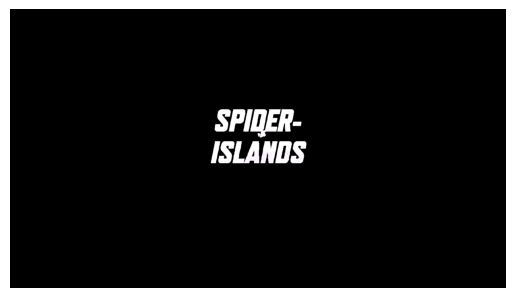

In [99]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

map = cv2.imread("Spider_island.jpeg")
map_rgb=cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3), np.uint8)#5
lower_white = np.array([232,240,235], dtype=np.uint8)
upper_white = np.array([255,255,255], dtype=np.uint8)

mask1 = cv2.inRange(map_rgb, lower_white, upper_white)

white_map = cv2.bitwise_and(map_rgb, map_rgb, mask=mask1)
dilated_map = cv2.dilate(white_map, kernel1, 1)

height, width, _ = map_rgb.shape
img1 = np.zeros((height, width),dtype=np.uint8)
cv2.rectangle(img1, (500,250), (1100,500), 255,-1)
masked_map = cv2.bitwise_and(dilated_map, dilated_map, mask=img1)

reader = easyocr.Reader(['en'])
lit_result = reader.readtext(masked_map)
print(lit_result)

plt.imshow(masked_map)
plt.axis("off")

***Hell's Heaven***

[([[np.int32(675), np.int32(309)], [np.int32(934), np.int32(309)], [np.int32(934), np.int32(408)], [np.int32(675), np.int32(408)]], 'HELLS', np.float64(0.9823862306845254)), ([[np.int32(659), np.int32(415)], [np.int32(953), np.int32(415)], [np.int32(953), np.int32(507)], [np.int32(659), np.int32(507)]], 'HEAVEN', np.float64(0.9769145719170361))]


(np.float64(-0.5), np.float64(1599.5), np.float64(898.5), np.float64(-0.5))

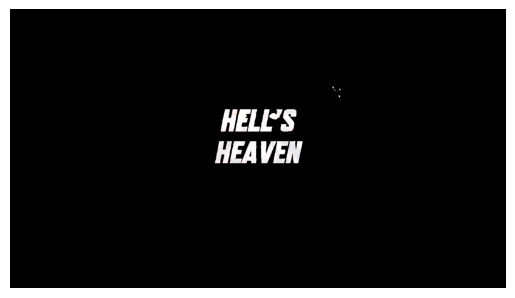

In [107]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

map = cv2.imread("HellsHeaven.jpeg")

map_rgb=cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

kernel1 = np.ones((3,3), np.uint8)#5
lower_white = np.array([225,225,225], dtype=np.uint8)
upper_white = np.array([255,255,255], dtype=np.uint8)

mask1 = cv2.inRange(map_rgb, lower_white, upper_white)

white_map = cv2.bitwise_and(map_rgb, map_rgb, mask=mask1)
dilated_map = cv2.dilate(white_map, kernel1, 1)

height, width, _ = map_rgb.shape
img1 = np.zeros((height, width),dtype=np.uint8)
cv2.rectangle(img1, (500,250), (1100,500), 255,-1)
masked_map = cv2.bitwise_and(dilated_map, dilated_map, mask=img1)

reader = easyocr.Reader(['en'])
lit_result = reader.readtext(masked_map)
print(lit_result)

plt.imshow(masked_map)
plt.axis("off")